In [ ]:
import datasets

dataset = datasets.load_dataset('json', data_files={'dev': 'dataset/dev.easy.json'})
dataset = dataset['dev']
references = {}
for entry in iter(dataset):
    references[entry['idx']] = entry['targets']

import json

with open('outputs/2021-07-27/11-25-35/output.json') as f:
    pred = json.load(f)

prediction = {}
for row in pred:
    output = '' if row['output'] == '[unanswerable]' else row['output']
    prediction[row['idx']] = output
    
from utils import get_raw_scores

get_raw_scores(prediction, references)

In [ ]:
get_raw_scores({'x':''}, {'x': ['']})

In [19]:
import json

from utils import get_raw_scores

with open('/data2/wenhu/Time-Sensitive-QA/outputs/2021-08-01/18-38-18/output.json', 'r') as f:
    predictions = json.load(f)

for flag in [' between ', ' in ', ' before ', ' after ']:
    with open('dataset/dev.hard.json') as f:
        reference = {}
        for line in f:
            q = json.loads(line)
            if flag in q['question']:
                reference[q['idx']] = q['targets']

    scores = []
    for k in reference:
        score = get_raw_scores({k: predictions[k]}, {k: reference[k]})['exact']
        scores.append(score)
    print(flag, len(reference), sum(scores) / len(scores))
#print(k, predictions[k], reference[k], score['exact'])

 between  1478 49.86468200270636
 in  1702 49.529964747356054
 before  393 51.14503816793893
 after  406 57.389162561576356


In [21]:
import json

from utils import get_raw_scores

with open('/data2/wenhu/Time-Sensitive-QA/outputs/2021-08-01/18-38-18/output.json', 'r') as f:
    predictions = json.load(f)

#for flag in [' between ', ' in ', ' before ', ' after ']:
for flag in ['P39', "P54", "P108", "P6", "P69", "P286", "P26"]:
    with open('dataset/dev.hard.json') as f:
        reference = {}
        for line in f:
            q = json.loads(line)
            if flag in q['idx']:
                reference[q['idx']] = q['targets']

    scores = []
    for k in reference:
        score = get_raw_scores({k: predictions[k]}, {k: reference[k]})['exact']
        scores.append(score)
    print(flag, len(reference), sum(scores) / len(scores))
#print(k, predictions[k], reference[k], score['exact'])

P39 789 44.35994930291508
P54 957 55.27690700104493
P108 357 47.89915966386555
P6 434 54.60829493087557
P69 310 54.83870967741935
P286 28 71.42857142857143
P26 147 60.54421768707483


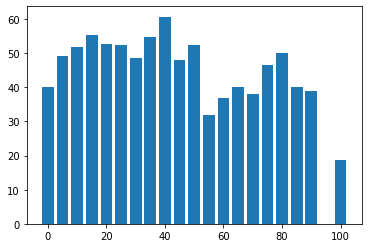

In [30]:
import json
from utils import get_raw_scores
import matplotlib.pyplot as plt
from collections import defaultdict

with open('/data2/wenhu/Time-Sensitive-QA/outputs/2021-08-01/18-38-18/output.json', 'r') as f:
    predictions = json.load(f)

with open('dataset/dev.hard.json') as f:
    reference = {}
    for line in f:
        q = json.loads(line)
        reference[q['idx']] = (len(q['paragraphs']), q['targets'])

inputs = defaultdict(list)
for k in reference:
    length, targets = reference[k]
    score = get_raw_scores({k: predictions[k]}, {k: targets})['exact']
    length = (length // 5) * 5
    inputs[length].append(score)

x, y = [], []
for k, v in inputs.items():
    x.append(k)
    y.append(sum(v) / len(v))

plt.bar(x, y, width=4)
plt.show()

In [ ]:
single, multiple = 0, 0
for k, q in reference.items():
    if 'Member of Parliament' in q[1] or 'MP' in q[1]:
        print(q[1])
    if len(q[1]) > 1:
        multiple += 1
    else:
        single += 1

In [4]:
import json

data = []
with open('dataset/dev.hard.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

answerable, na = 0, 0
for d in data:
    if d['targets'] == ['']:
        na += 1
    else:
        answerable += 1
        
print(na, answerable)

1249 2674
